## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
print("Distinct Mouse IDs in mouse metadata = %d." % mouse_metadata["Mouse ID"].count())
print("Distinct Mouse IDs in study results = %d."  % len(study_results["Mouse ID"].unique()) )
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID" )
# Display the data table for preview
merged_data


Distinct Mouse IDs in mouse metadata = 249.
Distinct Mouse IDs in study results = 249.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
print("Merged df has %d distinct mice.\n" % len(merged_data["Mouse ID"].unique()))

Merged df has 249 distinct mice.



In [3]:
# Getting the duplicate records by Mouse ID and Timepoint.
#study_results[study_results.duplicated(["Mouse ID","Timepoint"],keep=False)]
merged_data.set_index(["Mouse ID"]) 
merged_data[merged_data.duplicated (subset=["Mouse ID","Timepoint"],keep=False)].loc[:, ["Mouse ID","Timepoint"]]

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merged_data[merged_data.duplicated (subset=["Mouse ID","Timepoint"],keep=False)]



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
merged_data.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False,inplace=True)


In [6]:
# Checking the number of mice in the clean DataFrame.
print("After removing dups, merged df has %d distinct mice.\n" % len(merged_data["Mouse ID"].unique()))
print("Duplicates have been removed.  There are no repeated values for Mouse ID and Timepoint:")
merged_data = merged_data.set_index("Mouse ID")
merged_data.loc["g989"]

After removing dups, merged df has 249 distinct mice.

Duplicates have been removed.  There are no repeated values for Mouse ID and Timepoint:


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,25,56.045564,1
g989,Propriva,Female,21,26,30,59.082294,1
g989,Propriva,Female,21,26,35,62.570880,2


In [7]:
merged_data = merged_data.reset_index()
print("There should be no duplicate records, based on Mouse ID and Timepoint:")
merged_data[merged_data.duplicated (subset=["Mouse ID","Timepoint"],keep=False)].loc[:, ["Mouse ID","Timepoint"]]

There should be no duplicate records, based on Mouse ID and Timepoint:


,Mouse ID,Timepoint


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# maker_group = used_car_df.groupby('maker')
regimen_group    = merged_data.groupby('Drug Regimen') 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimen_mean     = regimen_group["Tumor Volume (mm3)"].mean()
regimen_median   = regimen_group["Tumor Volume (mm3)"].median()
regimen_variance = regimen_group["Tumor Volume (mm3)"].var()
regimen_stdev    = regimen_group["Tumor Volume (mm3)"].std()
regimen_sem      = regimen_group["Tumor Volume (mm3)"].sem()

#print(regimen_group ,regimen_mean,regimen_median,regimen_variance,regimen_stdev )

# Assemble the resulting series into a single summary dataframe.
regimen_results = pd.DataFrame(
                               {   "Regimen Mean"    : regimen_mean,
                                   "Regimen Median"  : regimen_median,
                                   "Regimen Variance": regimen_variance, 
                                   "Regimen Std Dev" : regimen_stdev,
                                   "Regimen SEM"     : regimen_sem
                               }
                              )
regimen_results

,Regimen Mean,Regimen Median,Regimen Variance,Regimen Std Dev,Regimen SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

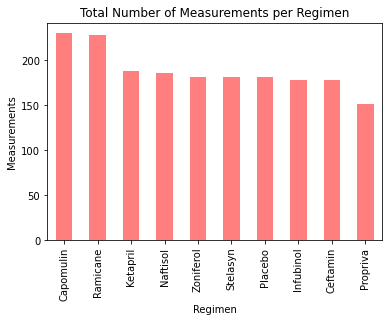

In [37]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#num_of_measurements = merged_data.groupby('Drug Regimen').count()
regimen_counts_df = pd.DataFrame(merged_data["Drug Regimen"].value_counts())
regimen_chart = regimen_counts_df.plot(kind="bar",color='r', alpha=0.5, align="center", \
                                           title="Total Number of Measurements per Regimen",\
                                           legend=False)
plt.xlabel("Regimen")
plt.ylabel("Measurements")
plt.show()

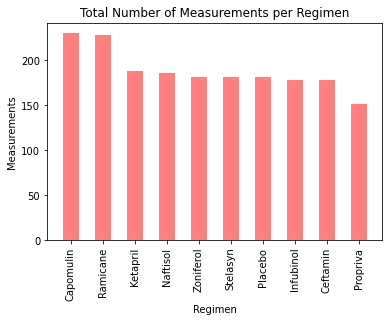

In [39]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen_counts  = merged_data["Drug Regimen"].value_counts()
x_values = regimen_counts.index
y_values = regimen_counts.values
plt.bar(x_values, y_values, color='r', alpha=0.5, align="center" , width=0.5)
x_axis = np.arange(len(x_values))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_values, rotation=90)
plt.title("Total Number of Measurements per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Measurements")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
